In [1]:
library(openxlsx)
library(dplyr)
library(ggplot2)
library(tibble)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
data = as.tibble(read.xlsx('journal.pone.0206767.s002.xlsx', colNames=TRUE))

In [3]:
data[is.na(data)] = 0

In [4]:
data$Ever_Bought_Other_Microtransaction[data$Ever_Bought_Other_Microtransaction == 2] = 0
data$Ever_Bought_Other_Microtransaction = as.logical(data$Ever_Bought_Other_Microtransaction)

data$Ever_Bought_LootBox[data$Ever_Bought_LootBox == 2] = 0
data$Ever_Bought_LootBox = as.logical(data$Ever_Bought_LootBox)

In [5]:
data = data %>% mutate(pgsi_score = PGSI1+PGSI2+PGSI3+PGSI4+PGSI5+PGSI6+PGSI7+PGSI8+PGSI9)
amount_categories = c('Never bought a loot box',
                      'Less than $1',
                      '$1-$5',
                      '$5-$10',
                      '$10-$15',
                      '$15-$20',
                      '$20-$30',
                      '$30-$40',
                      '$40-$50',
                      '$50-$75',
                      '$75-$100',
                      '$100-$200',
                      '$200-$300',
                      '$300+')
data$pg_severity = ''
data$lootbox_spend_discrete = ''
data$microtransaction_spend_discrete = ''

for(i in 1:nrow(data)) {
  cur_row = data[i,]
  severity = ''
  pgsi_score = cur_row[['pgsi_score']]
  if(pgsi_score == 0) {
    severity = 'non problem gambler'
  } else if(pgsi_score <= 4) {
    severity = 'low-risk gambler'
  } else if(pgsi_score <= 7) {
    severity = 'moderate-risk gambler'
  } else {
    severity = 'high-risk gambler'
  }
  data[[i,'pg_severity']] = severity
  data$OtherMicrotransactionSpend
  data[[i, 'lootbox_spend_discrete']] = amount_categories[data[[i, 'LootboxSpend']] + 1]
  data[[i, 'microtransaction_spend_discrete']] = amount_categories[data[[i, 'OtherMicrotransactionSpend']] + 1]
}

In [6]:
data$pg_severity = factor(data$pg_severity,
                          levels=c('non problem gambler',
                                   'low-risk gambler',
                                   'moderate-risk gambler',
                                   'high-risk gambler'),
                          ordered = TRUE)

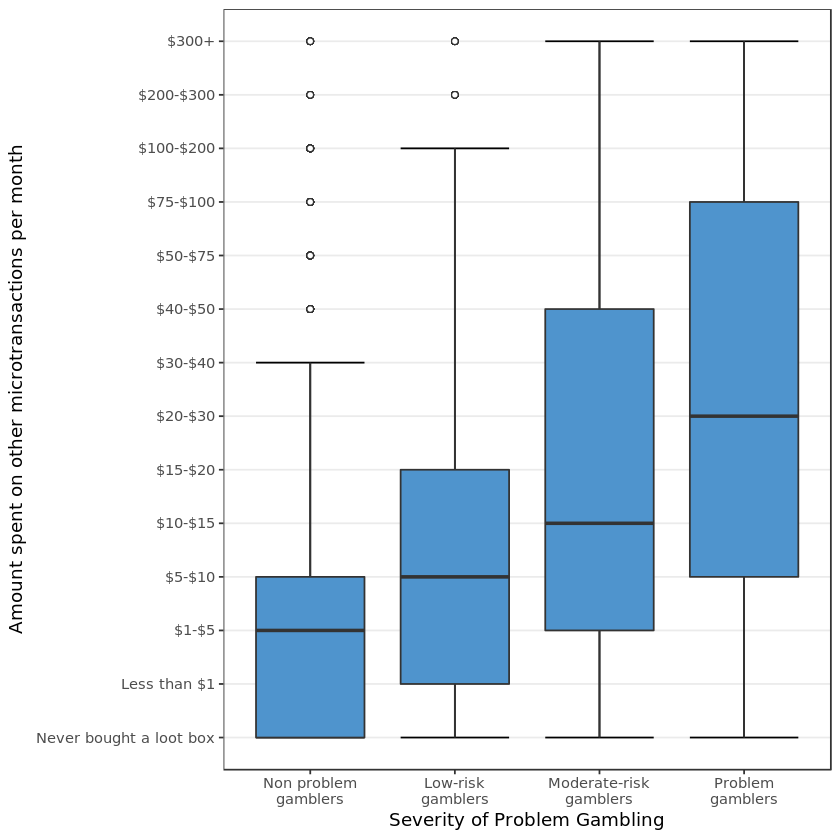

In [7]:
ggplot(data = data, aes(x = pg_severity, y = LootboxSpend + 1)) +
  stat_boxplot(geom = 'errorbar') +
  #This geom_point is necessary to add discrete labels to a boxplot
  geom_point(aes(y = lootbox_spend_discrete), alpha = 0) +
  #The geom_point breaks whithout the scale_y_discrete
  scale_y_discrete(labels=amount_categories) +
  geom_boxplot(fill = 'steelblue3', outlier.fill = 'white', outlier.shape = 21) +
  scale_x_discrete(labels=c('Non problem\ngamblers', 'Low-risk\ngamblers', 'Moderate-risk\ngamblers', 'Problem\ngamblers')) +
  xlab('Severity of Problem Gambling') +
  ylab('Amount spent on other microtransactions per month') +
  theme_bw() +
  theme(panel.grid.major.x = element_blank()) +
  geom_hline(yintercept = 1, color = 'black', size=0)